In [1]:
import pandas as pd
import numpy as np


# import machine Learning Alogrithms

In [2]:
from sklearn import tree

In [3]:
from sklearn import preprocessing

# load Dataset

In [4]:
titanic_train=pd.read_csv("train.csv")

In [5]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns


<AxesSubplot:>

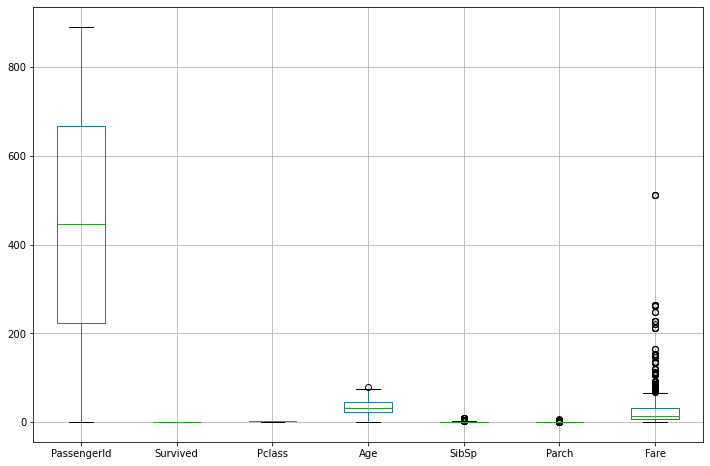

In [8]:
titanic_train.boxplot(figsize=(12,8))

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Survived'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

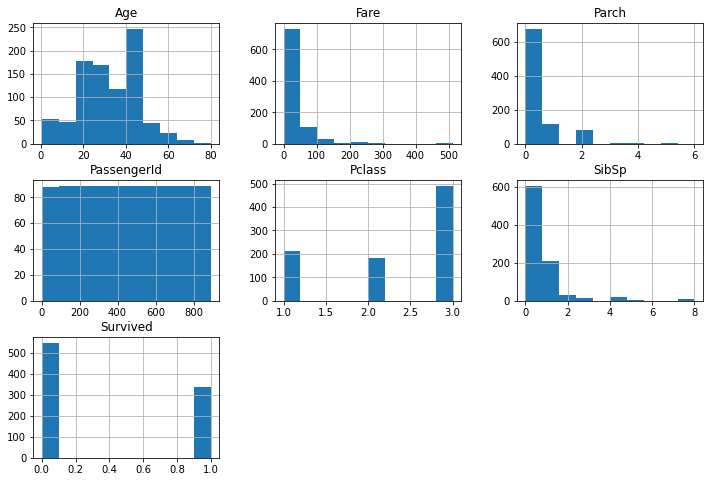

In [9]:
titanic_train.hist(figsize=(12,8))

# database information

In [10]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
titanic_train.shape

(889, 12)

In [12]:
titanic_train.size

10668

In [13]:
titanic_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,889.0,446.000000,256.998173,1.00,224.0000,446.0000,668.0,891.0000
Survived,889.0,0.382452,0.486260,0.00,0.0000,0.0000,1.0,1.0000
Pclass,889.0,2.311586,0.834700,1.00,2.0000,3.0000,3.0,3.0000
Age,889.0,32.699854,14.346821,0.42,22.0000,32.0000,45.0,80.0000
SibSp,889.0,0.524184,1.103705,0.00,0.0000,0.0000,1.0,8.0000
Parch,889.0,0.382452,0.806761,0.00,0.0000,0.0000,0.0,6.0000
Fare,889.0,32.096681,49.697504,0.00,7.8958,14.4542,31.0,512.3292


In [14]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.5+ KB


In [15]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [16]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,32.699854,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,14.346821,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,32.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,45.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Missing value in databse

In [17]:
label_encoder=preprocessing.LabelEncoder()

In [18]:
encoder_Sex=label_encoder.fit_transform(titanic_train['Sex'])

In [19]:
encoder_Sex.T

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,

In [20]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# Initize a Tree Model

In [21]:
tree_model=tree.DecisionTreeClassifier()

In [22]:
## ID=encoder_sex(Gender)
## DV=Survived

In [23]:
tree_model.fit(pd.DataFrame(encoder_Sex),y=titanic_train["Survived"])

DecisionTreeClassifier()

# visuazlize a model

In [24]:
#with open("Dtree1.dot","w") as f:
 #   f=tree.export_graphviz(pd.DataFrame(encoder_Sex),feature_names=["sex"],out_file=f)

In [25]:
tree_model.score(pd.DataFrame(encoder_Sex),y=titanic_train["Survived"])



0.7862767154105736

# #Adding 2 ID varaible

In [26]:
#ID=passenger class,gender

#DV=survived

In [27]:
predict=pd.DataFrame([(encoder_Sex),titanic_train["Pclass"]]).T
predict

,0,1
0,1,3
1,0,1
2,0,3
3,0,1
4,1,3
...,...,...
884,1,2
885,0,1
886,0,3
887,1,1


In [28]:
predict.dtypes

0    int64
1    int64
dtype: object

In [29]:
tree_model.fit(predict,titanic_train["Survived"])

DecisionTreeClassifier()

# visualize a model


In [30]:
#with open ("Dtree2.dot","w") as f:
 #   f=tree.export_graphviz(tree_model,feature_names=["sex","Pclass"],out_file=f)

In [31]:
titanic_train['Fare'].dtype

dtype('float64')

In [32]:
tree_model.score(predict,y=titanic_train["Survived"])






0.7862767154105736


# score of 2 ID variable is 0.7862767154105736

# Model no 3

In [33]:
# ID=encoder_sex(gender),passenger_class(pclass),age,fare
# Dv=Survived

In [34]:
titanic_train['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
884    13.0000
885    30.0000
886    23.4500
887    30.0000
888     7.7500
Name: Fare, Length: 889, dtype: float64

In [35]:
preditors=pd.DataFrame([encoder_Sex,titanic_train["Pclass"],titanic_train["Age"],titanic_train["Fare"]]).T

In [36]:
preditors

,0,1,2,3
0,1.0,3.0,22.0,7.2500
1,0.0,1.0,38.0,71.2833
2,0.0,3.0,26.0,7.9250
3,0.0,1.0,35.0,53.1000
4,1.0,3.0,35.0,8.0500
...,...,...,...,...
884,1.0,2.0,27.0,13.0000
885,0.0,1.0,19.0,30.0000
886,0.0,3.0,45.0,23.4500
887,1.0,1.0,26.0,30.0000


# Bulid a Model

In [37]:
tree_model=tree.DecisionTreeClassifier(max_depth=8)

In [38]:
tree_model.fit(preditors,y=titanic_train["Survived"])

DecisionTreeClassifier(max_depth=8)

In [39]:
with open("Dtree3.dot","w") as f:
    f=tree.export_graphviz(tree_model,feature_names=["sex","pclass","age","fare"],out_file=f)

In [40]:
tree_model.score(preditors,y=titanic_train["Survived"])

0.8976377952755905

# 0.8976377952755905 MODEL 3 with ID are 4 percentage are 89.00

# CREATE RANDOM FOREST ALL

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [43]:
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [44]:
# uses sex and Embarked 

# convert into string to numeric form

In [45]:
from sklearn.preprocessing import LabelEncoder 

In [46]:
titanic_train["Sex"]=label_encoder.fit_transform(titanic_train["Sex"])

In [47]:
titanic_train["Embarked"]=label_encoder.fit_transform(titanic_train["Embarked"])

In [48]:
titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


# inti Random forest 

In [49]:
rf_model=RandomForestClassifier(n_estimators=1000,max_features=2,oob_score=True)

In [50]:
feature=["Sex","Pclass","SibSp","Embarked","Age","Fare"]

In [51]:
rf_model.fit(X=titanic_train[feature],y=titanic_train["Survived"])

RandomForestClassifier(max_features=2, n_estimators=1000, oob_score=True)

In [52]:
print("OOB Accuracy")
print(rf_model.oob_score_)

OOB Accuracy
0.8110236220472441


In [53]:
for fec,imp in zip(feature,rf_model.feature_importances_):
    print(fec,imp)

Sex 0.26872986102416896
Pclass 0.08719985147506051
SibSp 0.05229915827790929
Embarked 0.034110595835107095
Age 0.27151486544379133
Fare 0.28614566794396284


# created new model

In [54]:
tree_model=tree.DecisionTreeClassifier()


In [55]:
preditors=pd.DataFrame([encoder_Sex,titanic_train["Age"],titanic_train["Fare"]]).T

In [56]:
tree_model.fit(X=preditors,y=titanic_train["Survived"])

DecisionTreeClassifier()

In [57]:
with open("final.dot","w") as f:
    f=tree.export_graphviz(tree_model,feature_names=["sex","age","are"],out_file=f)

In [58]:
#final=pd.DataFrame([titanic_train["Sex"],titanic_train["Age"],titanic_train["Fare"]]).T

In [59]:
tree_model.score(preditors,titanic_train["Survived"])

0.9763779527559056

# this model 97% accurate 

# Decision tree regression



In [60]:
train_datasets=pd.read_csv("train.csv")

In [61]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [62]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [65]:
titanic_train.drop(["Cabin"],axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,2
885,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,2
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,45.0,1,2,W./C. 6607,23.4500,2
887,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,0


In [78]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
Encoder_sex=le.fit_transform(titanic_train["Sex"])

In [79]:
test_feacture=pd.DataFrame([Encoder_sex,titanic_train["Pclass"],titanic_train["Fare"]]).T

In [80]:
test_feacture

,0,1,2
0,1.0,3.0,7.2500
1,0.0,1.0,71.2833
2,0.0,3.0,7.9250
3,0.0,1.0,53.1000
4,1.0,3.0,8.0500
...,...,...,...
884,1.0,2.0,13.0000
885,0.0,1.0,30.0000
886,0.0,3.0,23.4500
887,1.0,1.0,30.0000


In [83]:
test_pred=tree_model.predict(X=test_feacture)

# output result

In [86]:
predict_output=pd.DataFrame({"PassengerId":titanic_train["PassengerId"]
                             ,"Survived":test_pred
                             })

In [88]:
predict_output.to_csv("SUrvived pridicated.csv",index=False)